Ultrasound data shape: (16, 2, 3642912)
Time duration: 1214.30 seconds, minutes/seconds: 20/14.30


c:\Users\11581\.conda\envs\py39\lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\11581\.conda\envs\py39\lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


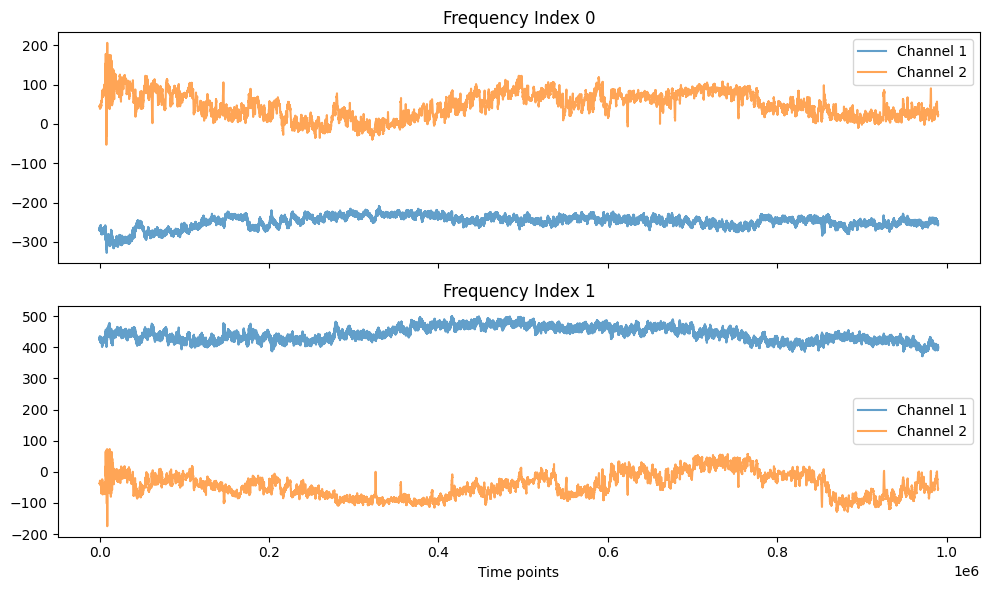

In [40]:
import numpy as np

import matplotlib.pyplot as plt

ultrasound_path = r"E:\dataset\ultrasound_video_audio\DATA\raw_data\lgd\aligned_ultrasound.npy"
ultrasound_data = np.load(ultrasound_path)
print(f"Ultrasound data shape: {ultrasound_data.shape}")

# Calculate duration
sampling_rate = 3000
num_points = ultrasound_data.shape[2]
duration = num_points / sampling_rate
print(f"Time duration: {duration:.2f} seconds, minutes/seconds: {duration//60:.0f}/{duration%60:.2f}")

# Plot waveforms for the first 2 frequencies
frequencies_to_plot = 2
fig, axes = plt.subplots(frequencies_to_plot, 1, figsize=(10, 6), sharex=True)

for i in range(frequencies_to_plot):
    # Plot I channel (channel 0)
    axes[i].plot(ultrasound_data[i, 0, 10000:1000000], label='Channel 1', alpha=0.7)
    # Plot Q channel (channel 1)
    axes[i].plot(ultrasound_data[i, 1, 10000:1000000], label='Channel 2', alpha=0.7)
    axes[i].set_title(f"Frequency Index {i}")
    axes[i].legend()

plt.xlabel("Time points")
plt.tight_layout()
plt.show() 





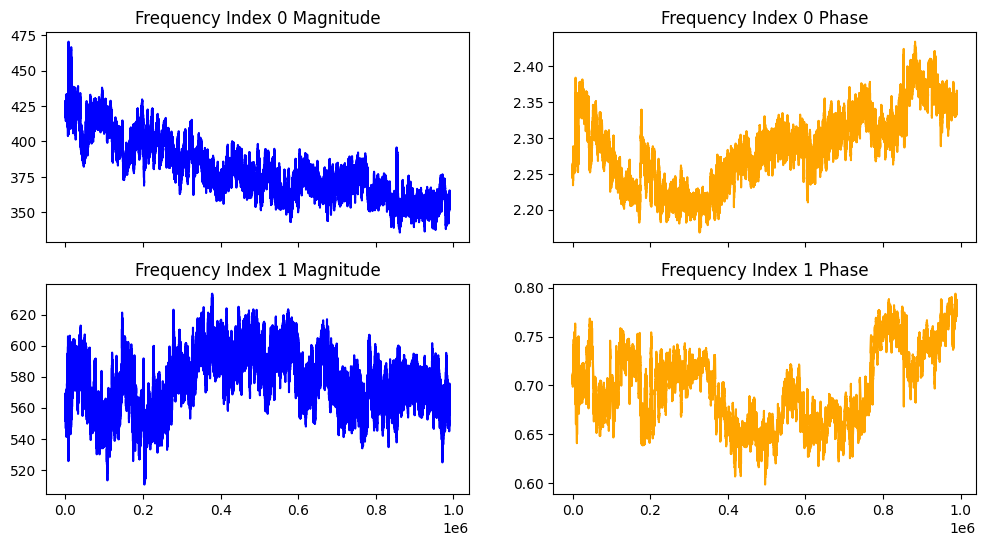

In [29]:

magnitude = np.sqrt(ultrasound_data[:, 0, 10000:1000000].real**2 + ultrasound_data[:, 0, 10000:1000000].imag**2)
phase = np.arctan2(ultrasound_data[:, 0, 10000:1000000].imag, ultrasound_data[:, 0, 10000:1000000].real)
phase = np.unwrap(phase, axis=1)

# Plot magnitude and phase for the first 2 frequencies
fig, axes = plt.subplots(frequencies_to_plot, 2, figsize=(12, 6), sharex=True)
for i in range(frequencies_to_plot):
    # Plot magnitude
    axes[i, 0].plot(magnitude[i, :], label='Magnitude', color='blue')
    axes[i, 0].set_title(f"Frequency Index {i} Magnitude")
    
    # Plot phase
    axes[i, 1].plot(phase[i, :], label='Phase', color='orange')
    axes[i, 1].set_title(f"Frequency Index {i} Phase")

In [5]:
from scipy.io import wavfile

audio_path = r"E:\dataset\ultrasound_video_audio\DATA\lgd\aligned_audio.wav"
sampling_rate_audio_expected = 48000
rate, audio_data = wavfile.read(audio_path)

print(f"Audio sampling rate: {rate}")
if rate != sampling_rate_audio_expected:
    print(f"Warning: Expected {sampling_rate_audio_expected}, but got {rate}")

duration_audio = audio_data.shape[0] / rate
print(f"Audio duration: {duration_audio:.2f} seconds， minutes/seconds: {duration_audio//60:.0f}/{duration_audio%60:.2f}")

Audio sampling rate: 48000
Audio duration: 1214.30 seconds， minutes/seconds: 20/14.30


Segment ultrasound data shape: (16, 3000)


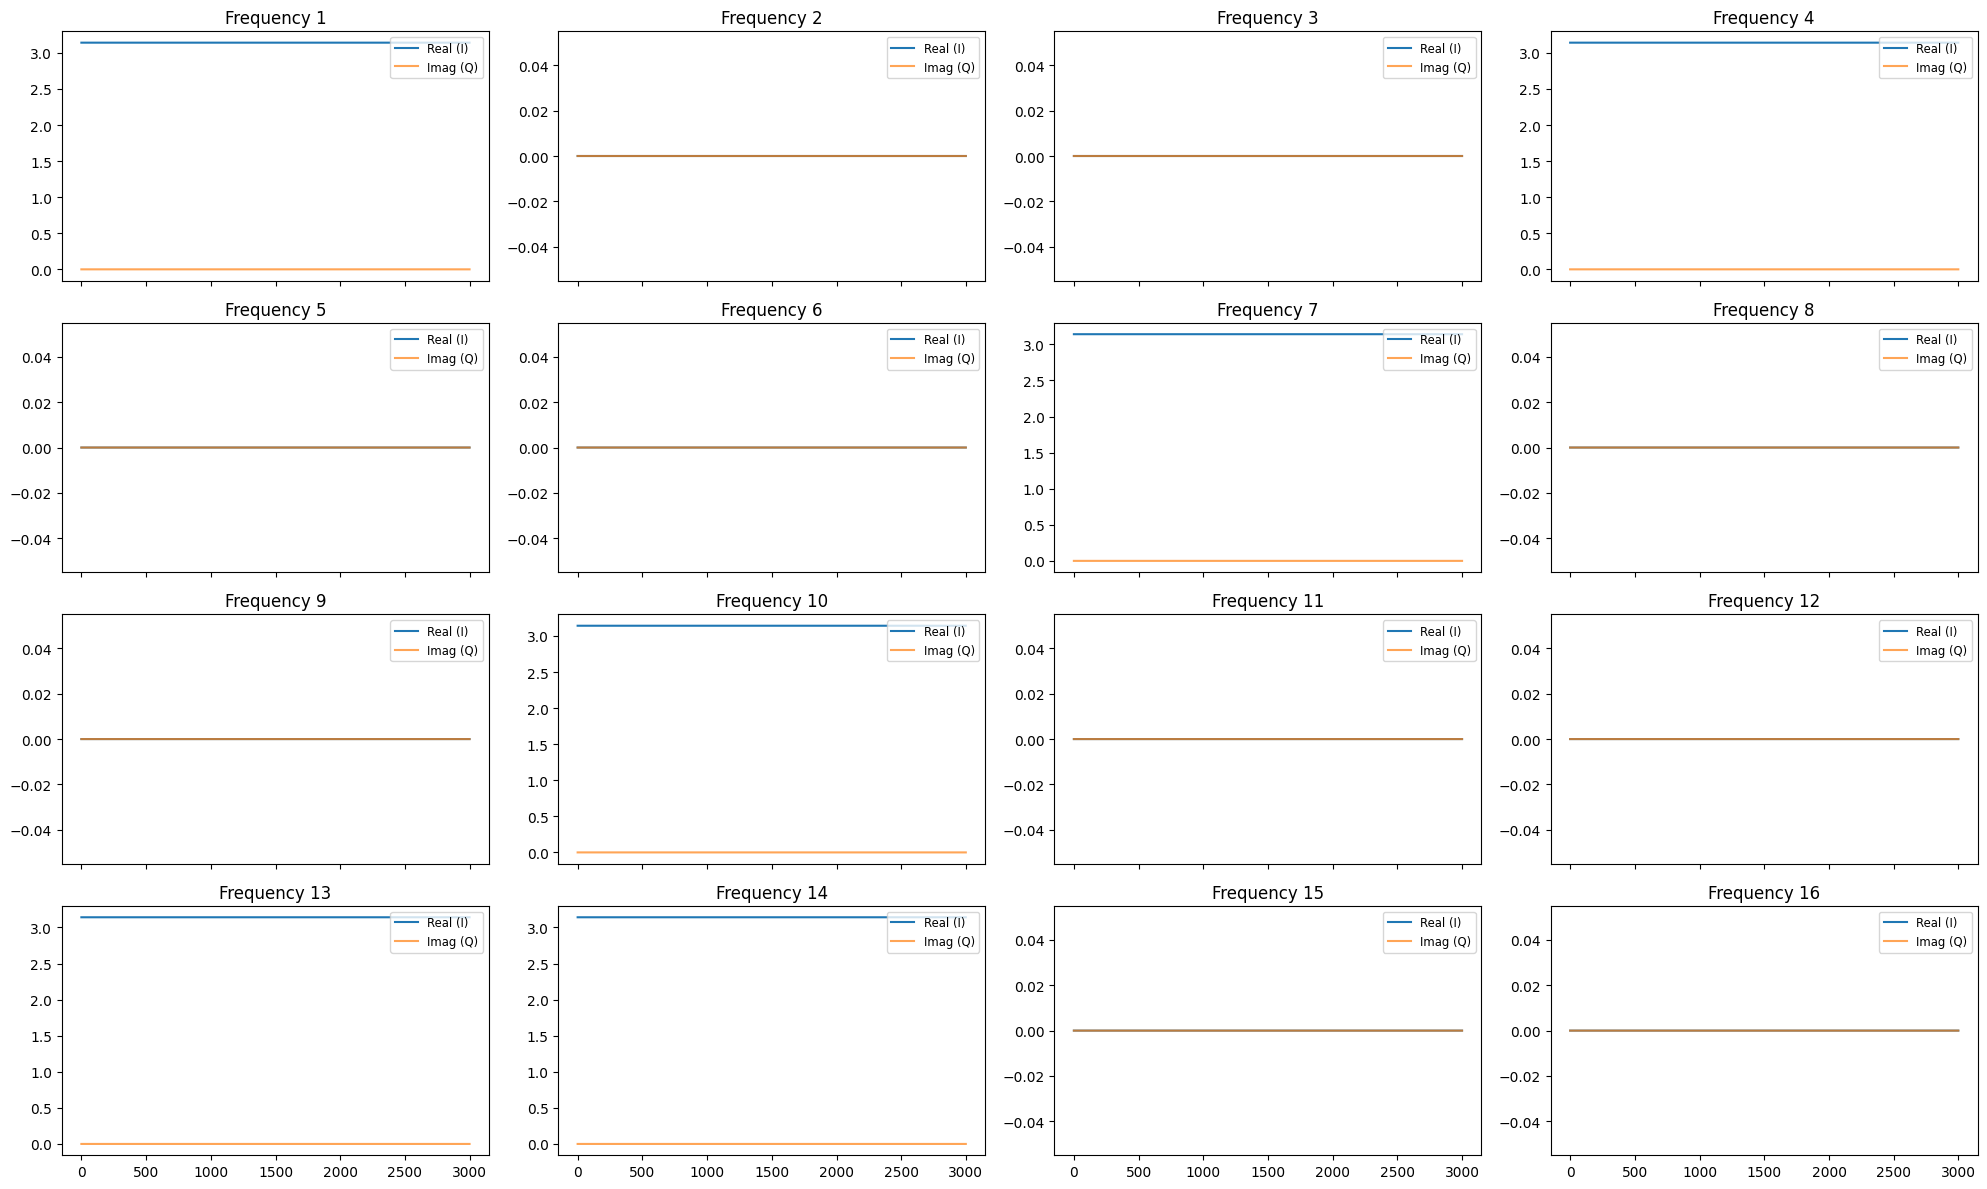

In [19]:
ultrasound_seg_path = r"E:\dataset\ultrasound_video_audio\DATA\dataset\ldx\ldx_seg_0001_us.npy"
ultrasound_seg_data = np.load(ultrasound_seg_path)

print(f"Segment ultrasound data shape: {ultrasound_seg_data.shape}")

# Create a 4x4 grid of subplots for the 16 segments
fig, axes = plt.subplots(4, 4, figsize=(20, 12), sharex=True)
axes = axes.flatten()

for i in range(16):
    # Plot real part (I channel) and imaginary part (Q channel)
    axes[i].plot(ultrasound_seg_data[i].real, label='Real (I)')
    axes[i].plot(ultrasound_seg_data[i].imag, label='Imag (Q)', alpha=0.7)
    axes[i].set_title(f"Frequency {i+1}")
    axes[i].legend(loc='upper right', fontsize='small')

plt.tight_layout()
plt.show()

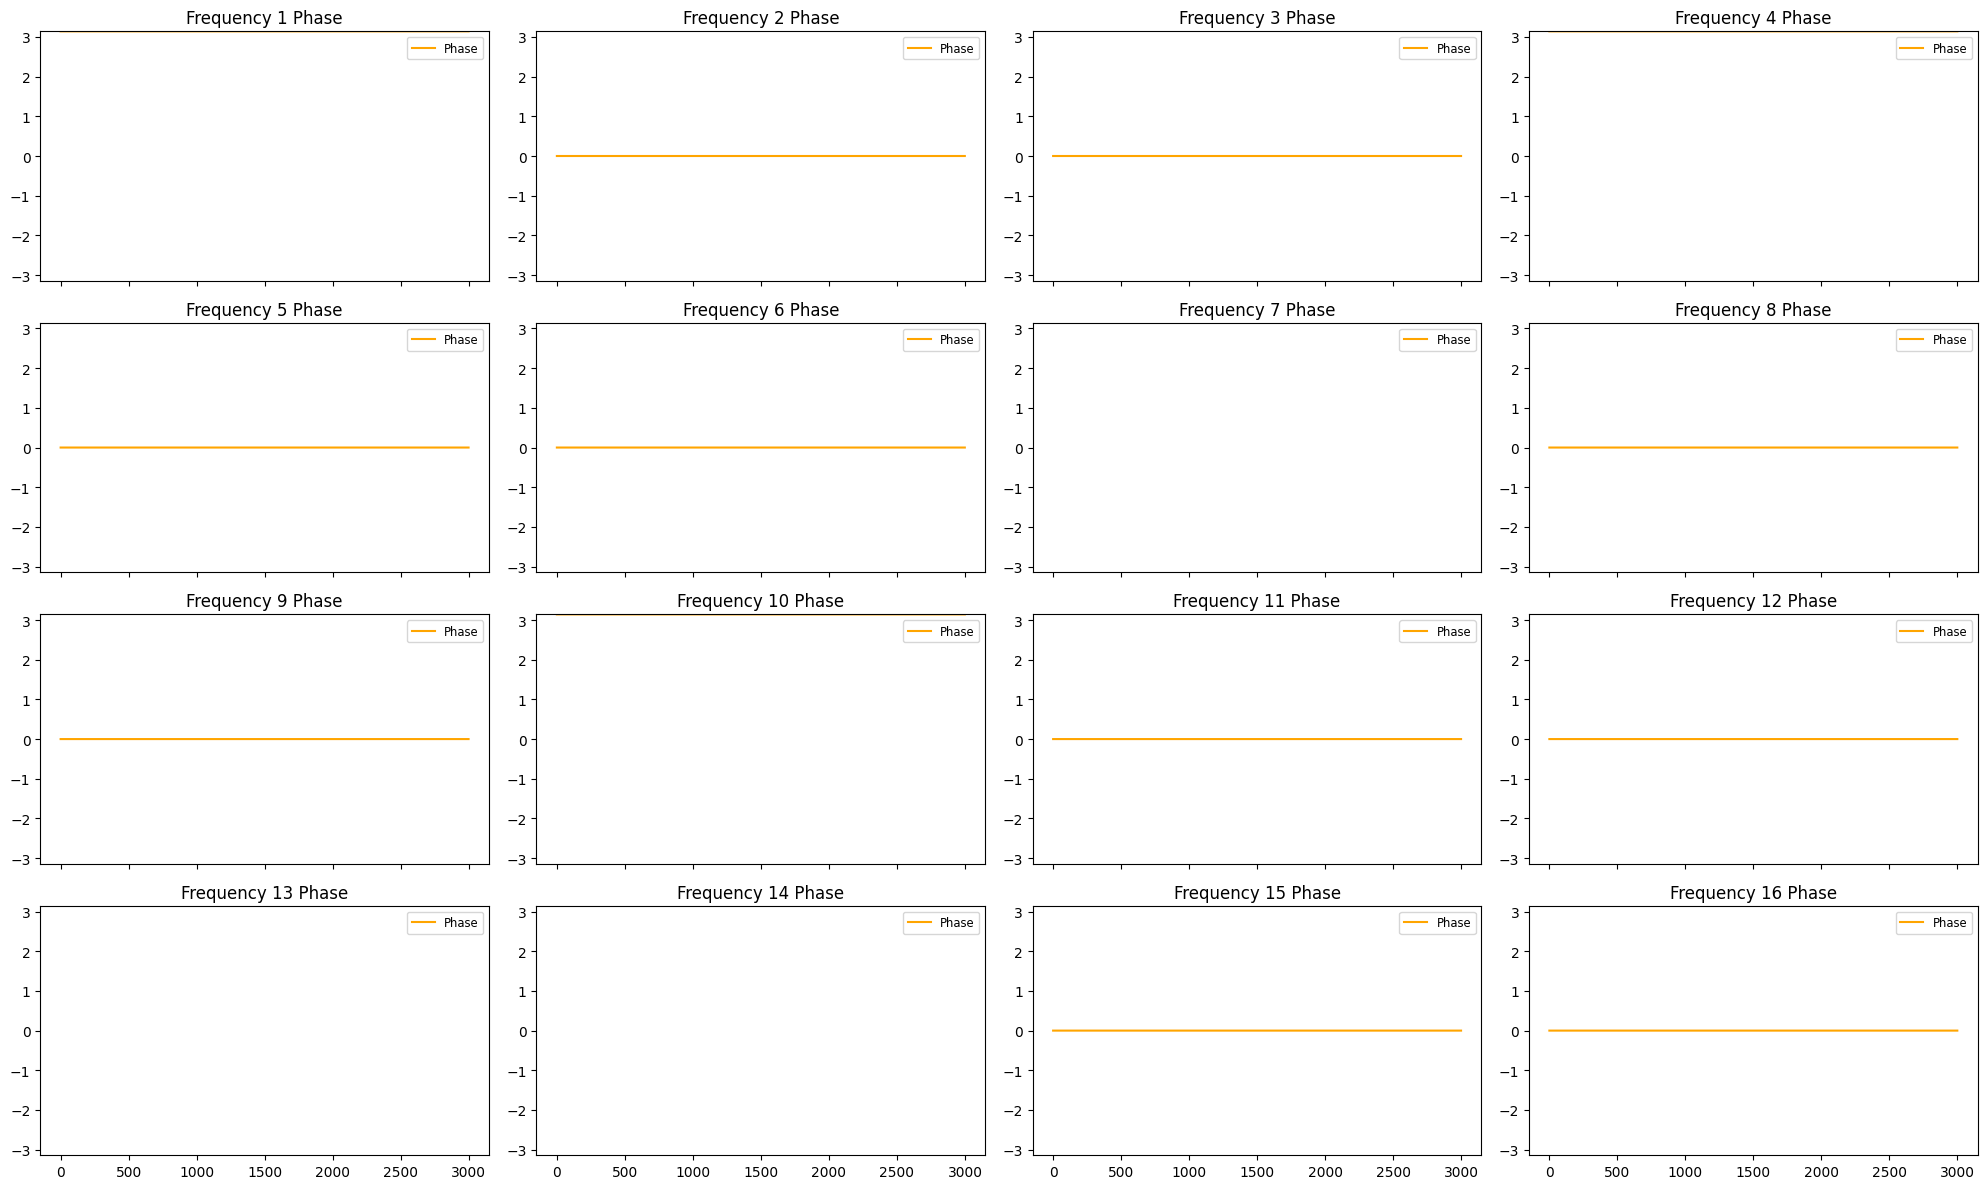

In [21]:
# Calculate phase
ultrasound_seg_path = r"E:\dataset\ultrasound_video_audio\DATA\dataset\jzh\jzh_seg_0001_us.npy"
ultrasound_seg_data = np.load(ultrasound_seg_path)
ultrasound_seg_phase = ultrasound_seg_data

# Create a 4x4 grid of subplots for the 16 segments
fig, axes = plt.subplots(4, 4, figsize=(20, 12), sharex=True)
axes = axes.flatten()

for i in range(16):
    # Plot phase
    # axes[i].set_ylim(-1, 1)

    axes[i].plot(ultrasound_seg_phase[i], label='Phase', color='orange')
    axes[i].set_title(f"Frequency {i+1} Phase")
    axes[i].set_ylim(-np.pi, np.pi) # Phase is typically between -pi and pi
    axes[i].legend(loc='upper right', fontsize='small')

plt.tight_layout()
plt.show()

ultrasound_seg_data 类型: float64
ultrasound_seg_data 形状: (2, 32, 3000)


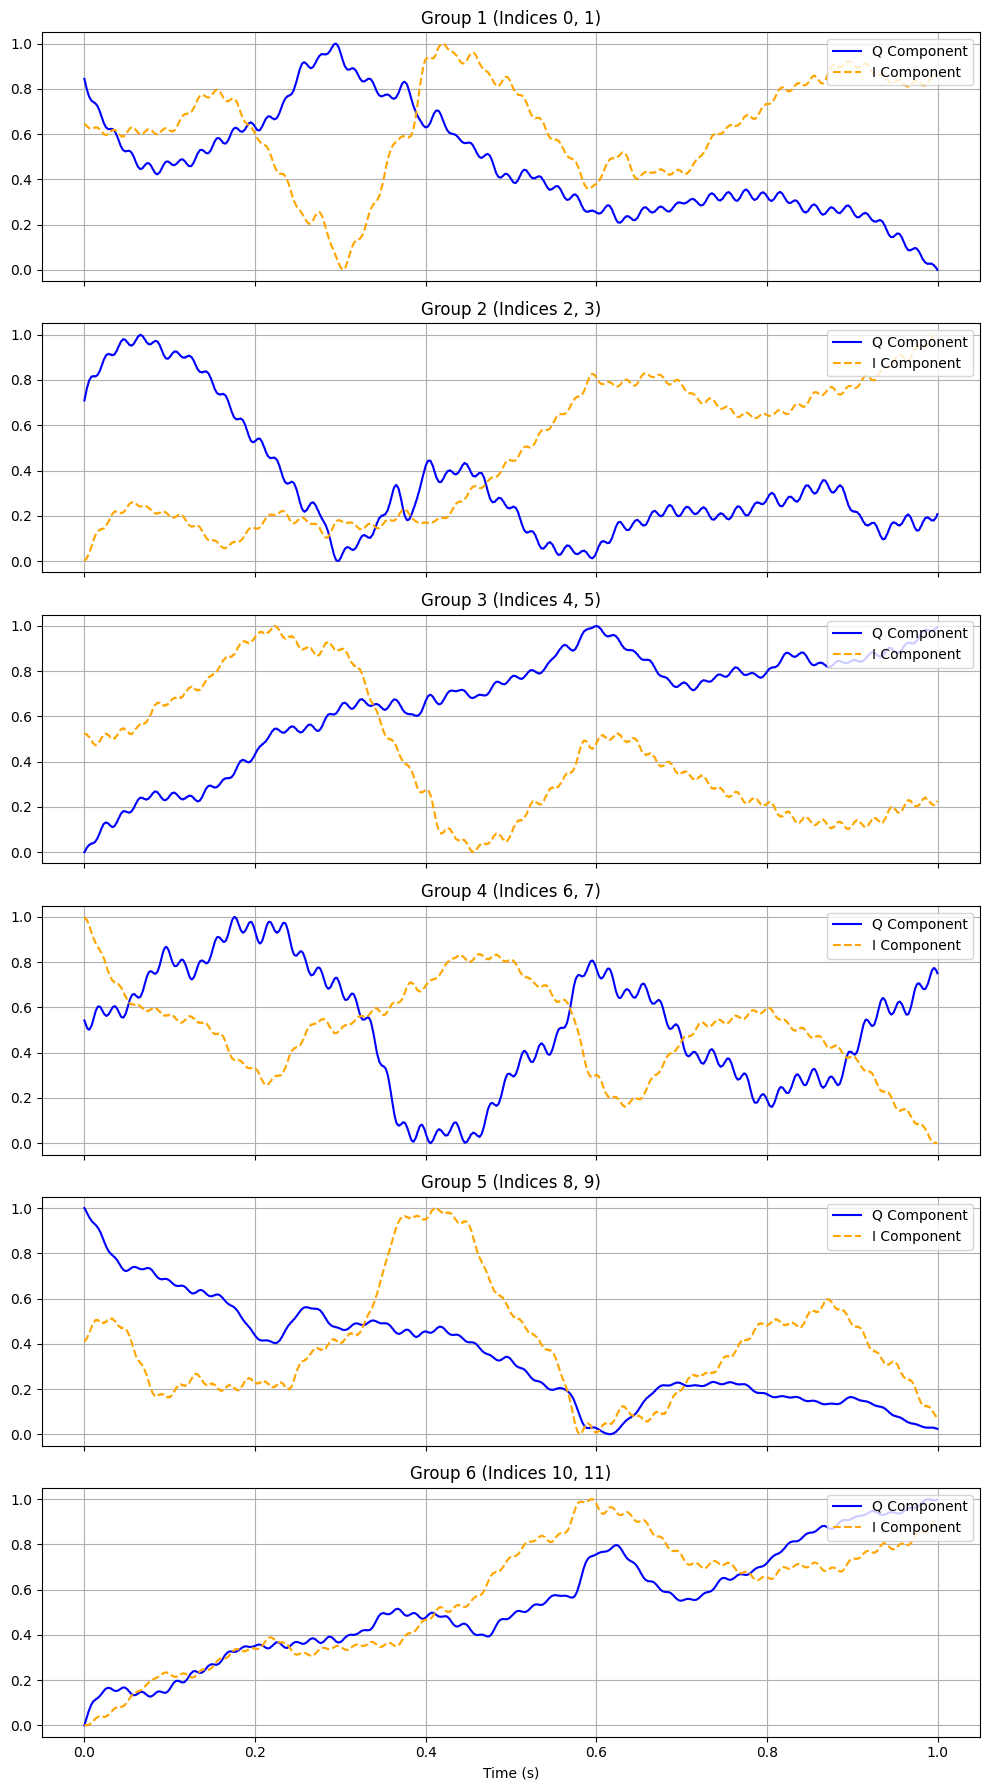

In [41]:
ultrasound_seg_path = r"E:\dataset\ultrasound_video_audio\DATA\dataset\ldx\ldx_seg_0856_us.npy"
ultrasound_seg_data = np.load(ultrasound_seg_path) #[2, 32, T]
print("ultrasound_seg_data 类型:", ultrasound_seg_data.dtype)       
print("ultrasound_seg_data 形状:", ultrasound_seg_data.shape)

num_groups_to_plot = 6
channel_index = 1  # First receiving channel
fs = 3000

# Time axis
time_axis = np.arange(ultrasound_seg_data.shape[2]) / fs

# fig, ax = plt.subplots(figsize=(12, 6))

# for i in range(num_groups_to_plot):
#     # IQ pairs are typically adjacent in the dimension 1
#     # Assuming layout: [I_f1, Q_f1, I_f2, Q_f2, ...]
#     i_idx = i * 2
#     q_idx = i * 2 + 1
    
#     # Plot I component
#     ax.plot(time_axis, ultrasound_seg_data[channel_index, i_idx, :], label=f'Group {i+1} I')
#     # Plot Q component
#     ax.plot(time_axis, ultrasound_seg_data[channel_index, q_idx, :], label=f'Group {i+1} Q', linestyle='--')

# ax.set_xlabel('Time (s)')
# ax.set_title(f'First Channel - First {num_groups_to_plot} IQ Groups')
# ax.legend()
# plt.tight_layout()
# plt.show()
# print("ultrasound_seg_data 形状:", ultrasound_seg_data.shape)

# Create subplots for each IQ group
fig, axes = plt.subplots(num_groups_to_plot, 1, figsize=(10, 3 * num_groups_to_plot), sharex=True)
for i in range(num_groups_to_plot):
    i_idx = i * 2
    q_idx = i * 2 + 1
    
    # Select the axis
    ax = axes[i] if num_groups_to_plot > 1 else axes
    
    # Plot Q component
    ax.plot(time_axis, ultrasound_seg_data[channel_index, i_idx, :], label='Q Component', color='blue')
    # Plot I component
    ax.plot(time_axis, ultrasound_seg_data[channel_index, q_idx, :], label='I Component', color='orange', linestyle='--')
    
    ax.set_title(f'Group {i+1} (Indices {i_idx}, {q_idx})')
    ax.legend(loc='upper right')
    ax.grid(True)

# Set common labels
if num_groups_to_plot > 1:
    axes[-1].set_xlabel('Time (s)')
else:
    axes.set_xlabel('Time (s)')

plt.tight_layout()
plt.show()